In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread, imsave
import os
from FoamQuant import *
plt.rc('font', size=15) 

In [2]:
ProcessPipeline = ['P1_Raw','P2_PhaseSegmented','P3_Cleaned','P4_BubbleSegmented','P5_BubbleNoEdge']

for Pi in ProcessPipeline:
    if  os.path.exists(Pi):
        print('path already exist:',Pi)
    else:
        os.mkdir(Pi)

path already exist: P1_Raw
path already exist: P2_PhaseSegmented
path already exist: P3_Cleaned
path already exist: P4_BubbleSegmented
path already exist: P5_BubbleNoEdge


# The raw image

In [3]:
nameread = 'Raw_'
namesave = 'PhaseSegmented_'
dirread = ProcessPipeline[0]+'/'
dirsave = ProcessPipeline[1]+'/'
imrange = [1,2,3,4,5]

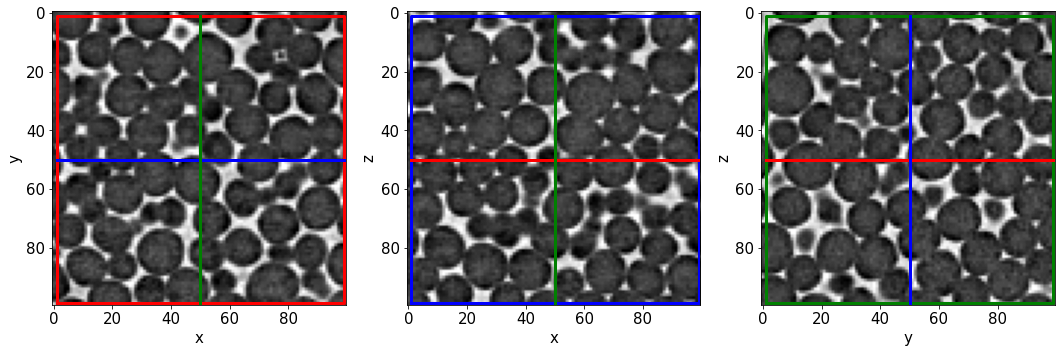

In [4]:
Im = imread(dirread+nameread+strindex(imrange[0], 3)+'.tif')
Cut3D(Im, showcuts=True, showaxes=True)

# Phase segmentation

In [5]:
th = PhaseSegmentation_Batch(nameread, 
                             namesave, 
                             dirread, 
                             dirsave, 
                             imrange, 
                             method='ostu_global',
                             returnOtsu=True, 
                             verbose=True, 
                             n0=3, 
                             endread='.tif', 
                             endsave='.tif')

PhaseSegmented_ 1: done
PhaseSegmented_ 2: done
PhaseSegmented_ 3: done
PhaseSegmented_ 4: done
PhaseSegmented_ 5: done


In [6]:
print('Otsu thresholds:',th)

Otsu thresholds: [125.009766, 125.009766, 126.00586, 126.00586, 126.00586]


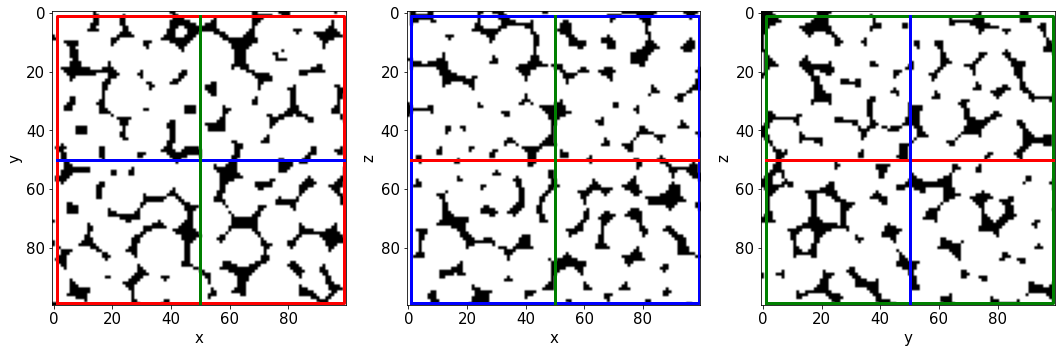

In [7]:
Im = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')
Cut3D(Im, showcuts=True, showaxes=True)

# Cleaned images

In [8]:
nameread = 'PhaseSegmented_'
namesave = 'Cleaned_'
dirread = ProcessPipeline[1]+'/'
dirsave = ProcessPipeline[2]+'/'
imrange = [1,2,3,4,5]

In [9]:
RemoveSpeckleBin_Batch(nameread, 
                       namesave, 
                       dirread, 
                       dirsave, 
                       imrange, 
                       verbose=True, 
                       endread='.tif', 
                       endsave='.tif', 
                       n0=3, 
                       Cobj=0.5, 
                       Chole=0.5)

3 848020
5 151963
First image (vox): maxObj 848018 maxHole 151961
Thresholds (vox): thrObj 424009 thrHole 75980
Cleaned_ 1: done
Cleaned_ 2: done
Cleaned_ 3: done
Cleaned_ 4: done
Cleaned_ 5: done


/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Process.py:181: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  image = remove_small_objects(image, min_size=np.int(np.max(v_obj_beg)-2))
/gpfs/offline1/staff/tomograms/users/flosch/Rheometer_Jupyter/FoamQuant/Process.py:203: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  image = remove_small_objects(image, min_size=np.int(np.max(v_hol_beg)-2))


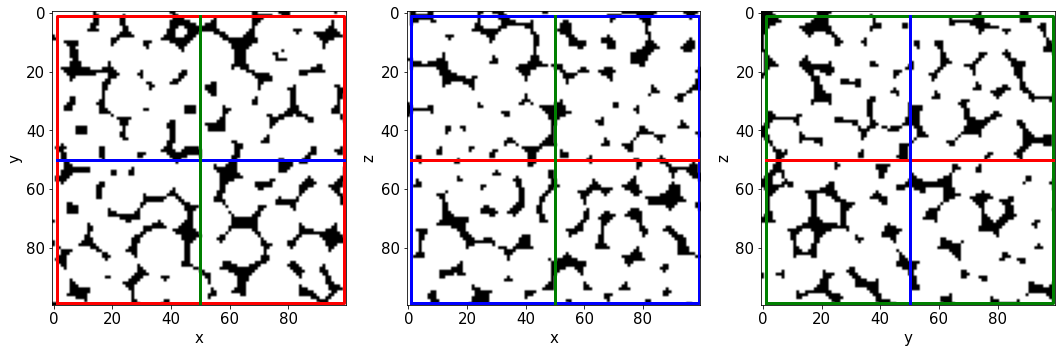

In [10]:
Im = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')
Cut3D(Im, showcuts=True, showaxes=True)

# Labelled images

In [4]:
nameread = 'Cleaned_'
namesave = 'BubbleSeg_'
dirread = ProcessPipeline[2]+'/'
dirsave = ProcessPipeline[3]+'/'
imrange = [1,2,3,4,5]

In [6]:
BubbleSegmentation_Batch(nameread, 
                         namesave, 
                         dirread, 
                         dirsave, 
                         imrange, 
                         verbose=True, 
                         endread='.tif', 
                         endsave='.tif', 
                         n0=3)

Path exist: True
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_ 1: done
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_ 2: done
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_ 3: done
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_ 4: done
Distance map: done
Seeds distance map: done
Seeds: done
Watershed distance map: done
Watershed: done
BubbleSeg_ 5: done


Number of labels: 1000


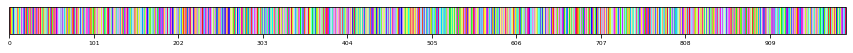

In [6]:
rcmap = RandomCmap(1000)

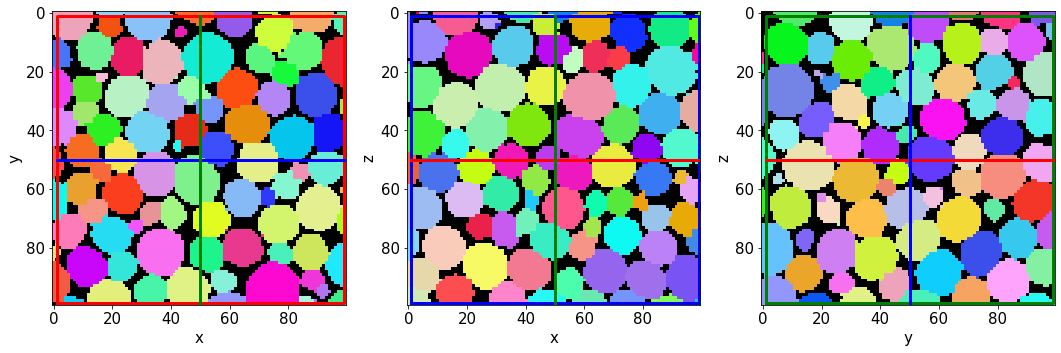

In [16]:
Im = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')
Cut3D(Im, showcuts=True, showaxes=True, cmap=rcmap, interpolation='nearest')

# Remove labels on the edges

In [3]:
nameread = 'BubbleSeg_'
namesave = 'BubbleNoEdge_'
dirread = ProcessPipeline[3]+'/'
dirsave = ProcessPipeline[4]+'/'
imrange = [1,2,3,4,5]

In [4]:
RemoveEdgeBubble_Batch(nameread, 
                         namesave, 
                         dirread, 
                         dirsave, 
                         imrange, 
                         verbose=True, 
                         endread='.tif', 
                         endsave='.tif', 
                         n0=3)

Path exist: True
BubbleNoEdge_001: done
BubbleNoEdge_002: done
BubbleNoEdge_003: done
BubbleNoEdge_004: done
BubbleNoEdge_005: done


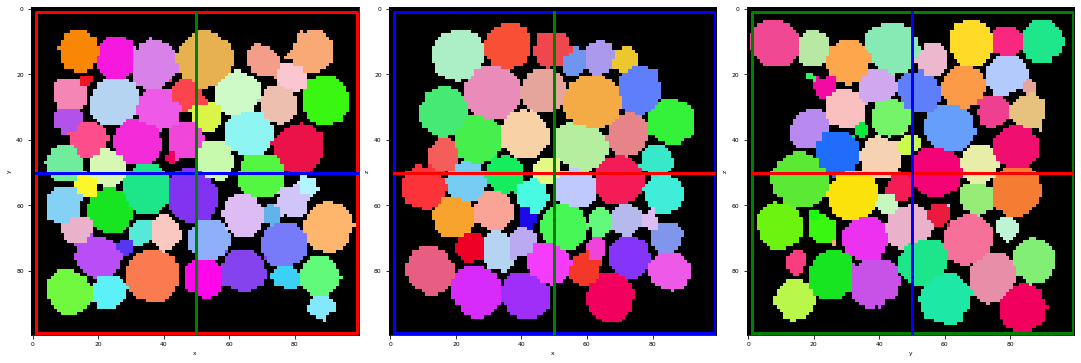

In [7]:
Im = imread(dirsave+namesave+strindex(imrange[0], 3)+'.tif')
Cut3D(Im, showcuts=True, showaxes=True, cmap=rcmap, interpolation='nearest')